# *Pós-graduação em Ciência e Dados e Machine Learning*
### *Trabalho Final - Machine Learning*

**Disciplina:** Fundamentos de Machine Learning

**Professor:** André Juan Costa Vieira

**Turma:** A

**Nomes dos Integrantes:** 

1- Matheus Mendes Neves

2- 

3-

## Qualidade de vinhos. 

Você foi contratado como cientista de dados pela famosa vinícola **"Vini Tradizionali di Manduria"** para analisar todos os aspectos dos vinhos produzidos. Diversas questões foram levantadas, como: Compreender os padrões das características que proporcionam boas safras e a qualidade de novos vinhos produzidos, antes que a comunidade mundial **"Vins Spectaculaires"** os deguste, apontar quais são os novos **"blends"** que podem ter continuidade no desenvolvimento, dentre várias outras atividades que visam as boas tomadas de decisões, sempre com o intuito de servir os melhores rótulos, aumentando os lucros e diminuindo os gastos.        

A equipe de enólogos faz estudos frequentes para verificar as características de cada vinho, colocando-os em planilhas. Para melhor compreensão dos dados, descreveram o que significado de cada propriedade.   


##### Descrição 

**0. Color:** Se o vinho é tinto vermelho ou branco

**1. Fixed Acidity:** Qtd.de Ácido não volátil, aquele que não evapora fácil

**2. Volatile Acidity:** Teor de ácido acético que leva a um sabor desagradável de vinagre

**3. Citric Acid:** Um tipo de ácido que age como conservante para aumentar o nível de acidez em pequena quantidade para adicionar aroma e sabor

**4. Residual Sugar:** Qtd. de açúcar restante depois da fermentação, mais de 45g/litro é doce

**5. Chlorides:** Qtd. de sal

**6. Free Sulfur Dioxide:** Componente que impede crescimento microbiano e a oxidação do vinho

**7. Total Sulfur Dioxide:** Qtd. de SO2 (dióxido de enxofre)

**8. Density:** Densidade do vinho,

**9. pH:** Nível de acidez ou potencial hidrogeniônico

**10. Sulphates:** Um adicional que contribui para níveis de SO2 e é 
antimicróbico e antioxidante 

**11. Alcohol:** Qtd. de álcool

**12. Qualidade:** Notas de 3 a 9

# Questões

### Importe todas as bibliotecas necessárias na célula abaixo
##### Organize-as de forma crescente em relação ao tamanho da frase

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# Carregar os dados
df = pd.read_csv("wines.csv")
df_treated = pd.read_csv("wines_pre_processing.csv")

### Tratamento dos Dados


Sir. Pounce, enólogo de longa data, especializado em vinhos italianos, descobriu que estão faltando alguns valores nas planilhas, e que outros dados foram alterados pelo ex-funcionário Smeagle, dispensado por degustar vinhos 'preciosos'.   

**Utilize o dataset 'wines_preprocessing.csv' para fazer as questões abaixo.**

1- Busque os valores faltantes no dataset e trate-os.

2- Busque valores incongruentes no dataset, imprima e os trate. 

3- Valide seus tratamentos com o dataset **'wines.csv'**, demonstrando se foi possível manter as distribuições de forma adequada.

In [ ]:
# ==============================================================
# Dicionário para definir o número de casas decimais na exibição dos valores
# ==============================================================
decimal_places = {
    "fixed acidity": 1,
    "volatile acidity": 2,
    "citric acid": 2,
    "residual sugar": 2,
    "chlorides": 4,
    "free sulfur dioxide": 1,
    "total sulfur dioxide": 1,
    "density": 4,
    "pH": 2,
    "sulphates": 2,
    "alcohol": 1,
    "quality": 0,
}

# ==============================================================
# Validação e Conversão da Coluna "color"
# ==============================================================
print("\n==============================================================")
print("🔍 Processando coluna: color")
print("==============================================================")

# Exibir valores antes do tratamento
print("📌 Valores únicos ANTES do tratamento:")
print(df["color"].unique())

# Contar valores faltantes antes do tratamento
missing_colors_before = df["color"].isna().sum()
print(f"❌ Valores faltantes ANTES do tratamento: {missing_colors_before}")

# Identificar valores inconsistentes antes da conversão
inconsistent_colors = df[~df["color"].isin(["red", "white"])]["color"].dropna()
if not inconsistent_colors.empty:
    print("⚠️ Valores inconsistentes encontrados:")
    print(inconsistent_colors.unique())

# Tratar valores inconsistentes
df["color"] = df["color"].where(df["color"].isin(["red", "white"]), None)

# Definir o método de preenchimento
method_used = "Moda (valor mais frequente)"
fill_value = df["color"].mode()[0]

# Preencher valores faltantes
df["color"].fillna(fill_value, inplace=True)

# Contar valores faltantes depois do tratamento
missing_colors_after = df["color"].isna().sum()

# Exibir valores depois do tratamento
print("\n📌 Valores únicos DEPOIS do tratamento:")
print(df["color"].unique())
print(f"✔️ Valores faltantes DEPOIS do tratamento: {missing_colors_after}")
print(f"📊 Método de preenchimento usado: {method_used}")
print("==============================================================")

# ==============================================================
# Processamento geral das colunas numéricas
# ==============================================================
for col, decimals in decimal_places.items():
    print("\n==============================================================")
    print(f"🔍 Processando coluna: {col}")
    print("==============================================================")

    # Exibir valores antes do tratamento
    print("📌 Valores únicos ANTES do tratamento:")
    print(df[col].unique())

    # Contar valores faltantes antes do tratamento
    missing_values_before = df[col].isna().sum()
    print(f"❌ Valores faltantes ANTES do tratamento: {missing_values_before}")

    # Identificar valores inconsistentes antes da conversão
    inconsistent_values = df[~df[col].astype(str).str.replace('.', '', 1).str.isnumeric()][col].dropna()
    if not inconsistent_values.empty:
        print(f"⚠️ Valores inconsistentes encontrados:")
        print(inconsistent_values.unique())

    # Converter para numérico
    df[col] = pd.to_numeric(df[col], errors="coerce")  

    # Contar valores faltantes depois da conversão
    missing_values_after_conversion = df[col].isna().sum()

    # Definir o método de preenchimento baseado no tipo da variável
    if df[col].nunique() == 2:  
        fill_value = df[col].mode()[0]  # Se for uma variável binária, usa a moda
        method_used = "Moda (valor mais frequente)"
    elif df[col].skew() > 1:  
        fill_value = df[col].median()  # Se for assimétrica, usa a mediana
        method_used = "Mediana"
    else:  
        fill_value = df[col].mean()  # Caso contrário, usa a média
        method_used = "Média"

    # Preencher valores NaN
    df[col].fillna(fill_value, inplace=True)

    # Contar valores faltantes depois do preenchimento
    missing_values_after_fill = df[col].isna().sum()

    # Exibir valores depois do tratamento
    print("\n📌 Valores únicos DEPOIS do tratamento:")
    print([f"{x:.{decimals}f}" for x in df[col].unique()])
    print(f"✔️ Valores faltantes DEPOIS do tratamento: {missing_values_after_fill}")
    print(f"📊 Método de preenchimento usado: {method_used}")
    print("==============================================================")




🔍 Processando coluna: color
📌 Valores únicos ANTES do tratamento:
['white' 'red' 'dois' 'leonidas, para te arrumar essas "confusão"' 'amo'
 'vinho ruim' nan 'deep learning' 'my precious' 'vai dar não' 'bart' 'ml']
❌ Valores faltantes ANTES do tratamento: 3
⚠️ Valores inconsistentes encontrados:
['dois' 'leonidas, para te arrumar essas "confusão"' 'amo' 'vinho ruim'
 'deep learning' 'my precious' 'vai dar não' 'bart' 'ml']

📌 Valores únicos DEPOIS do tratamento:
['white' 'red']
✔️ Valores faltantes DEPOIS do tratamento: 0
📊 Método de preenchimento usado: Moda (valor mais frequente)

🔍 Processando coluna: fixed acidity
📌 Valores únicos ANTES do tratamento:
['6.6' '6.9' '6.7' '7.1' '8.3' '8.0' '6.0' '11.9' '6.8' '7.7' '11.5' '7.3'
 '6.4' '7.6' '5.8' '10.2' '5.1' '7.5' '7.9' '10.4' '6.1' '5.6' '10.0'
 '7.2' '12.5' '8.4' '5.9' '8.5' '10.6' '7.8' '5.4' '6.5' '6.3' '14.3'
 '8.7' '5.7' '5.3' '7.0' '9.0' '8.8' '6.2' '12.3' '7.4' '8.2' '8.1' '9.8'
 '8.6' '10.3' '9.6' '9.3' '8.9' '5.2' '15.5' '9

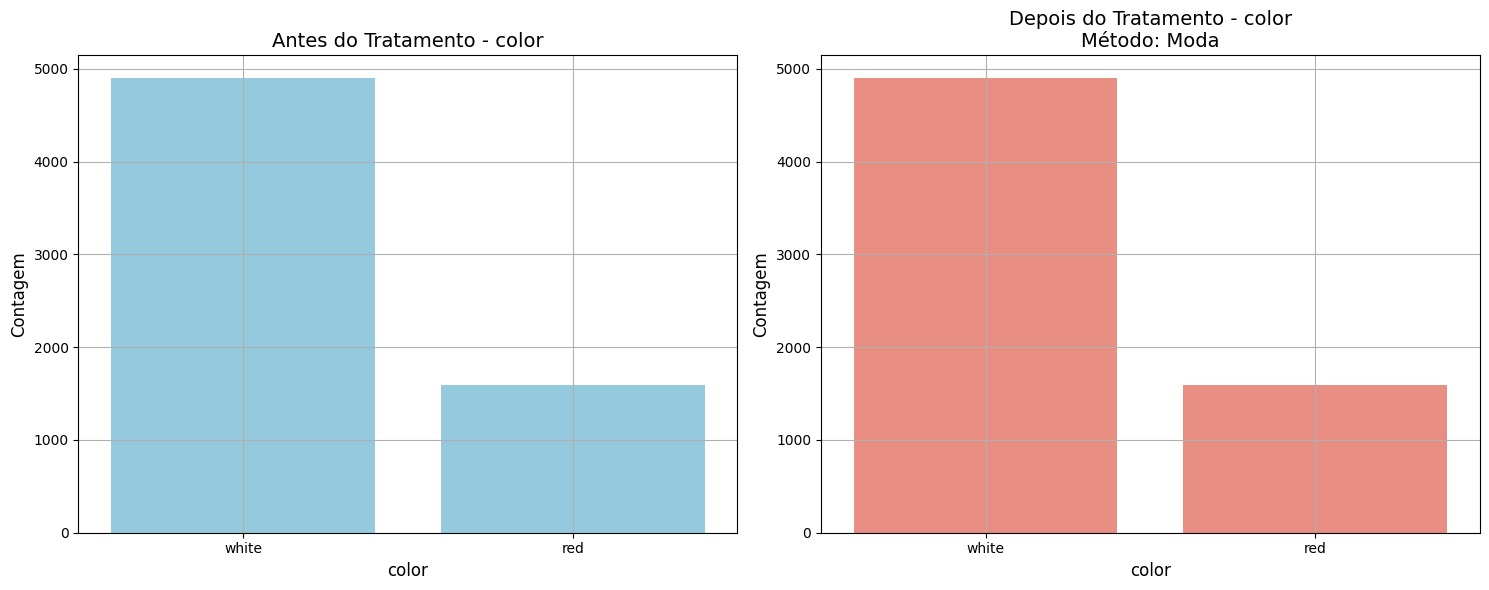

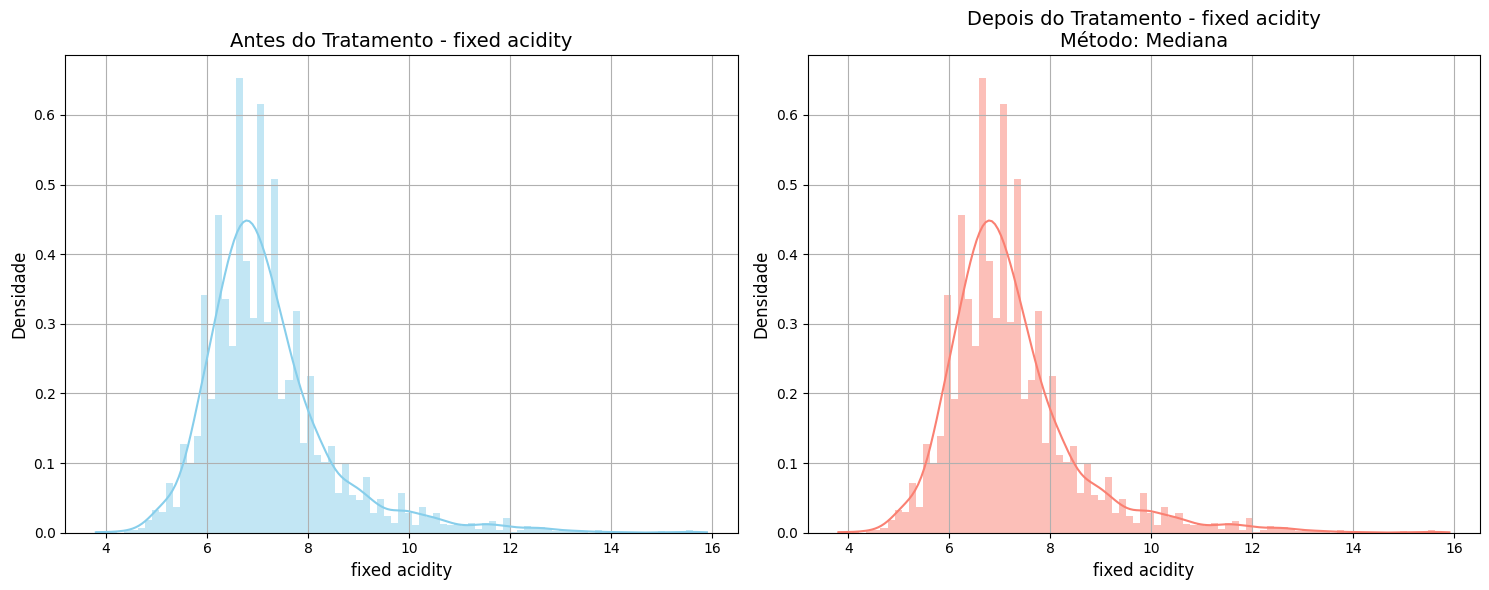

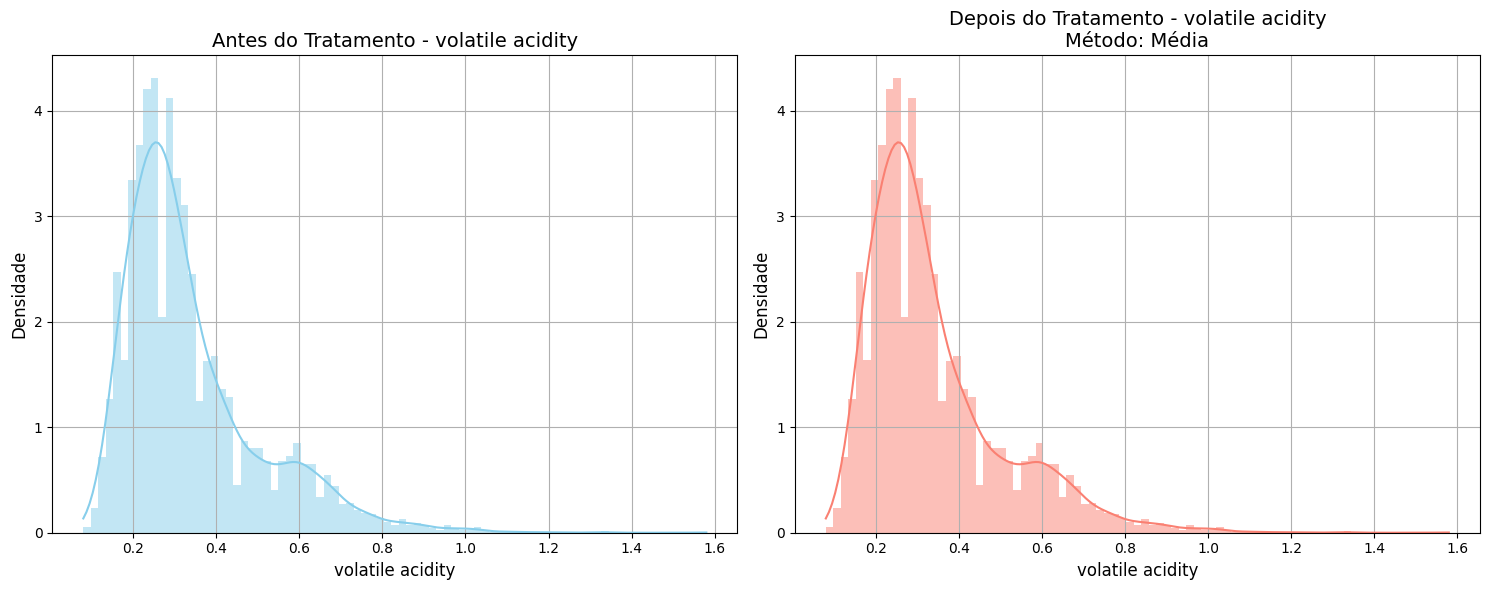

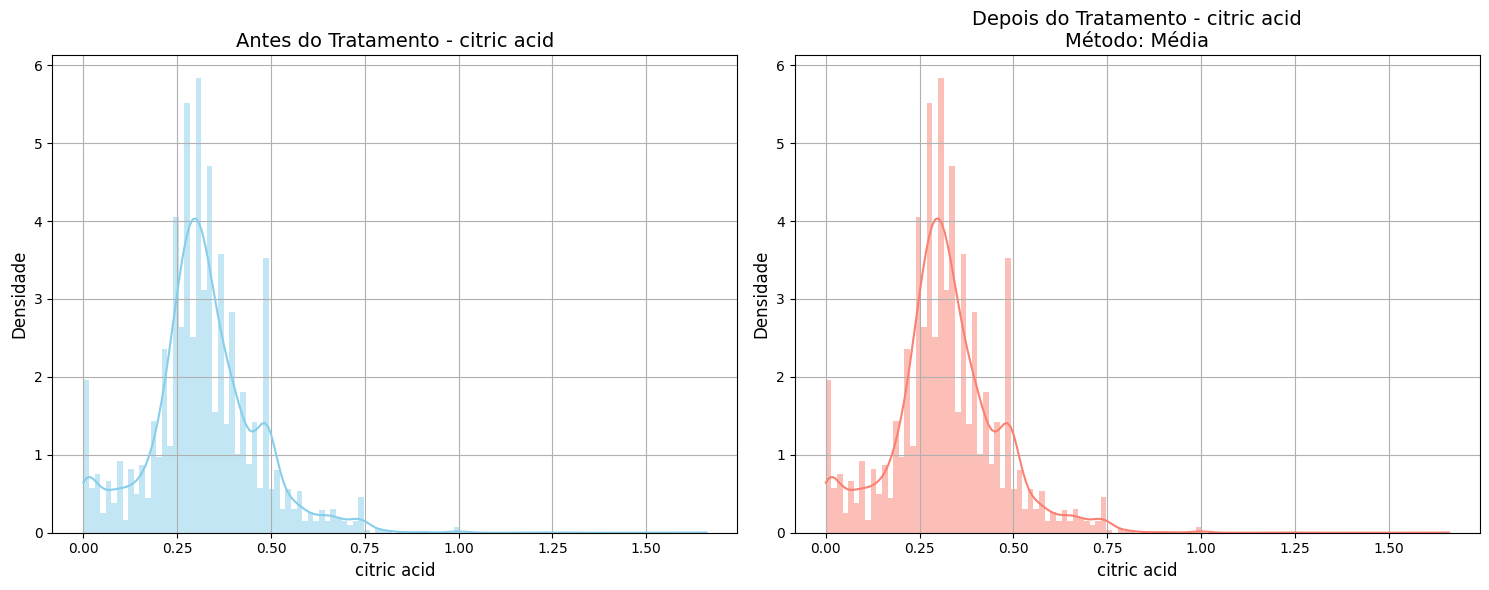

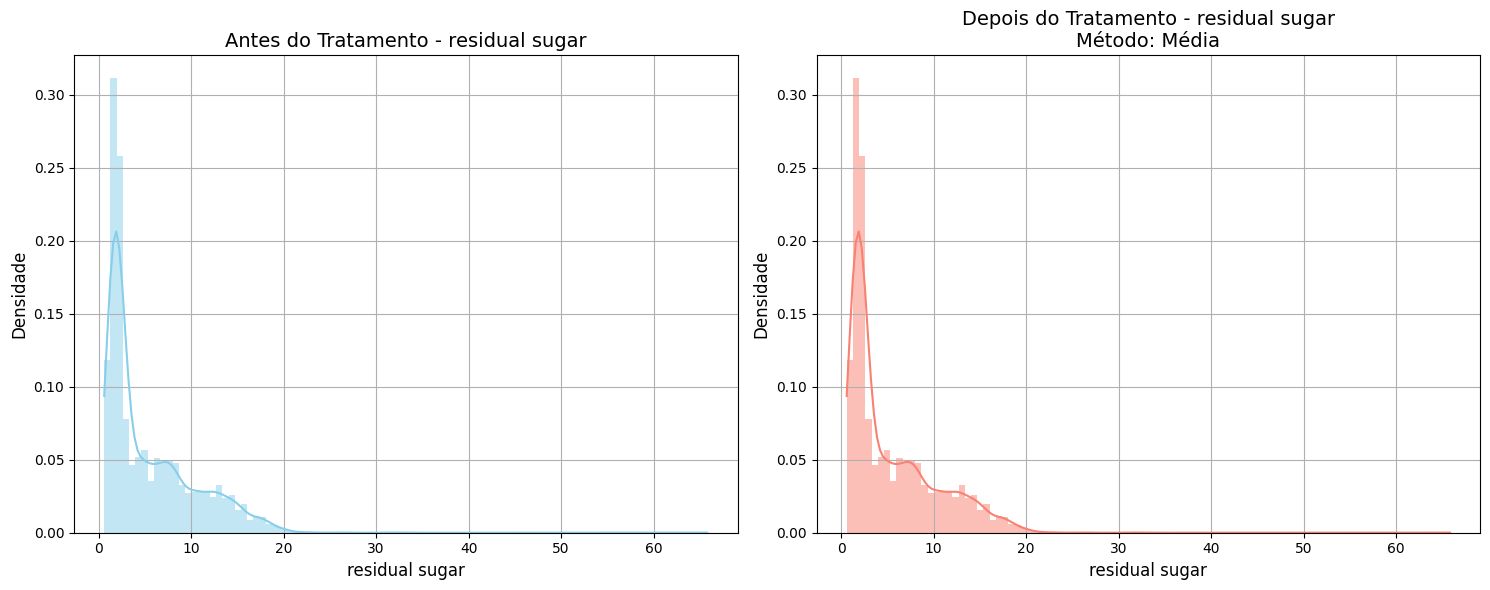

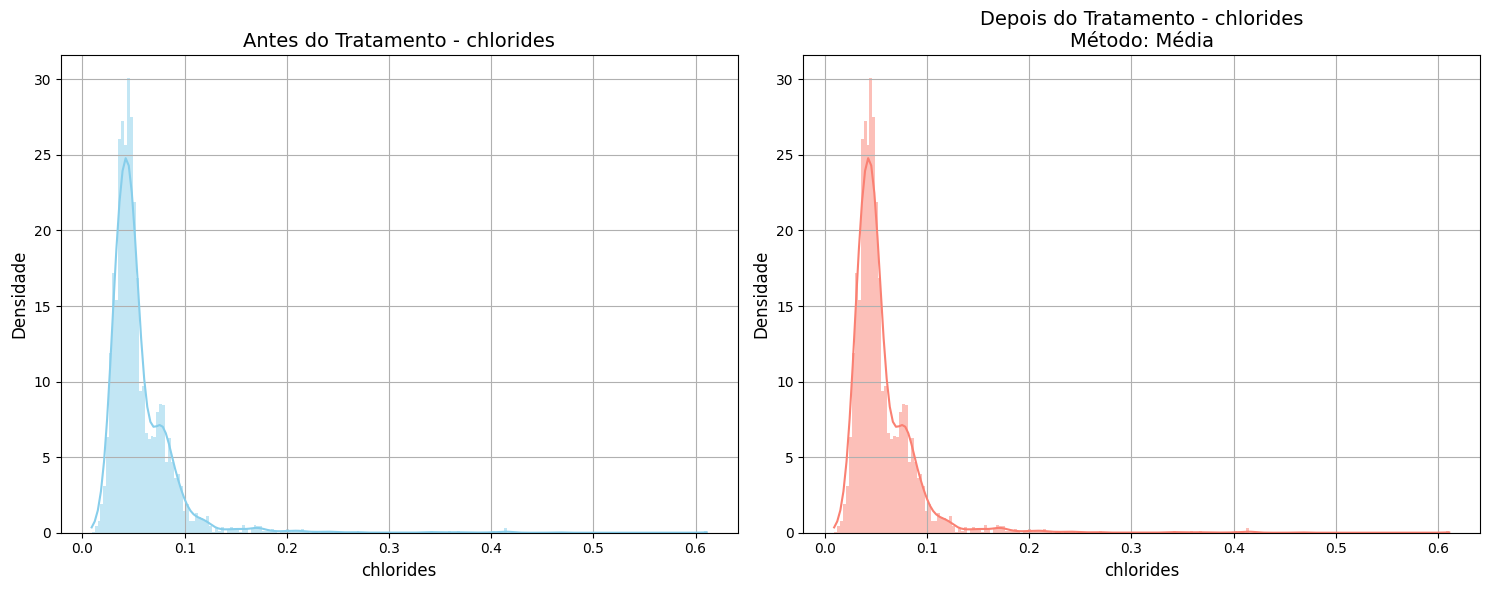

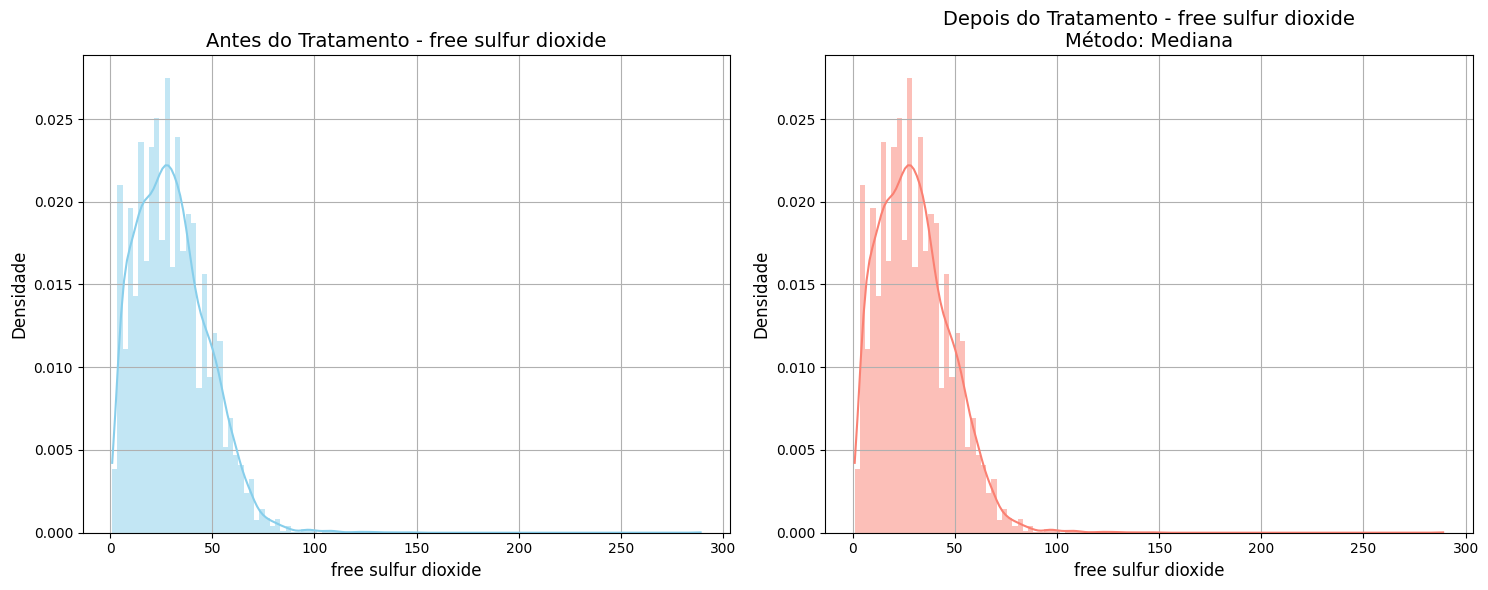

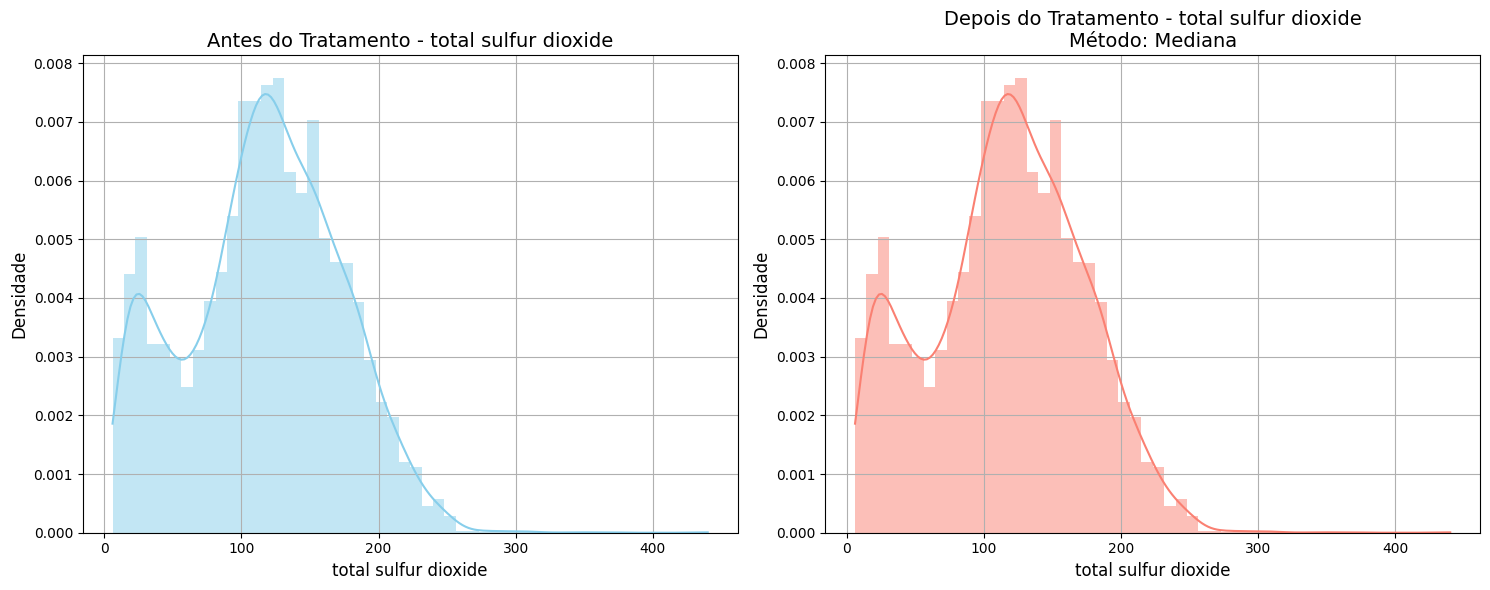

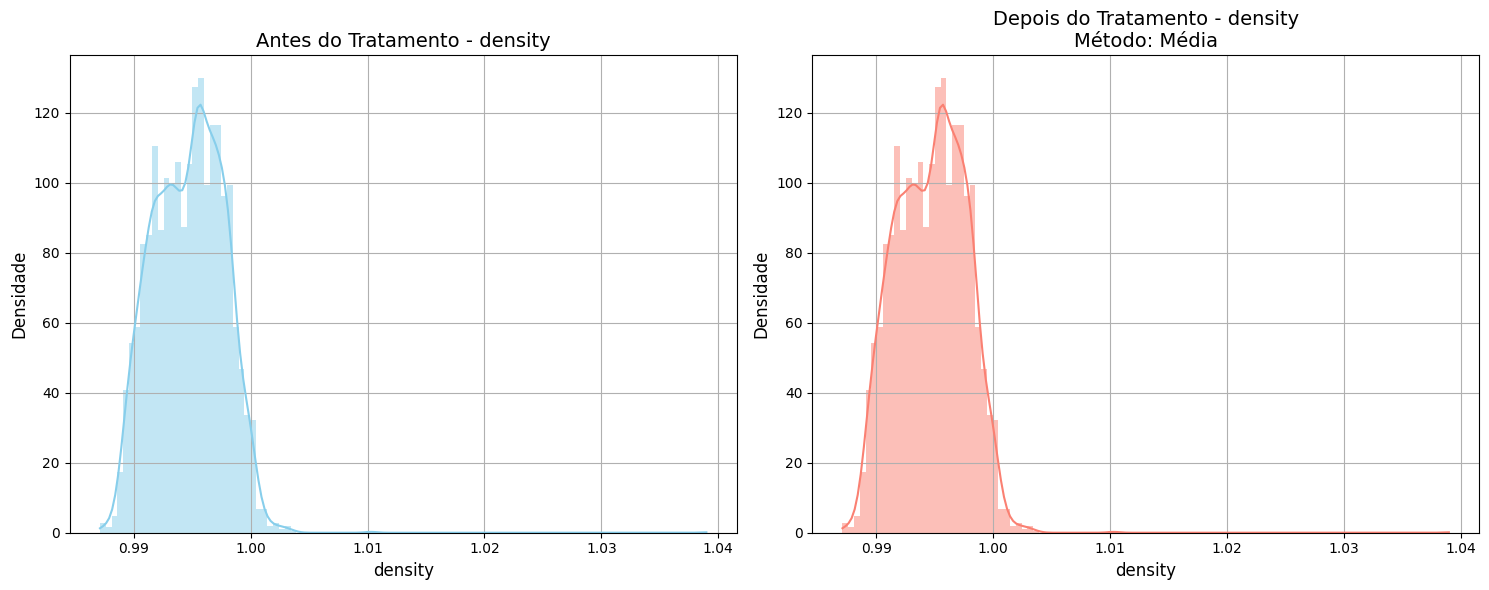

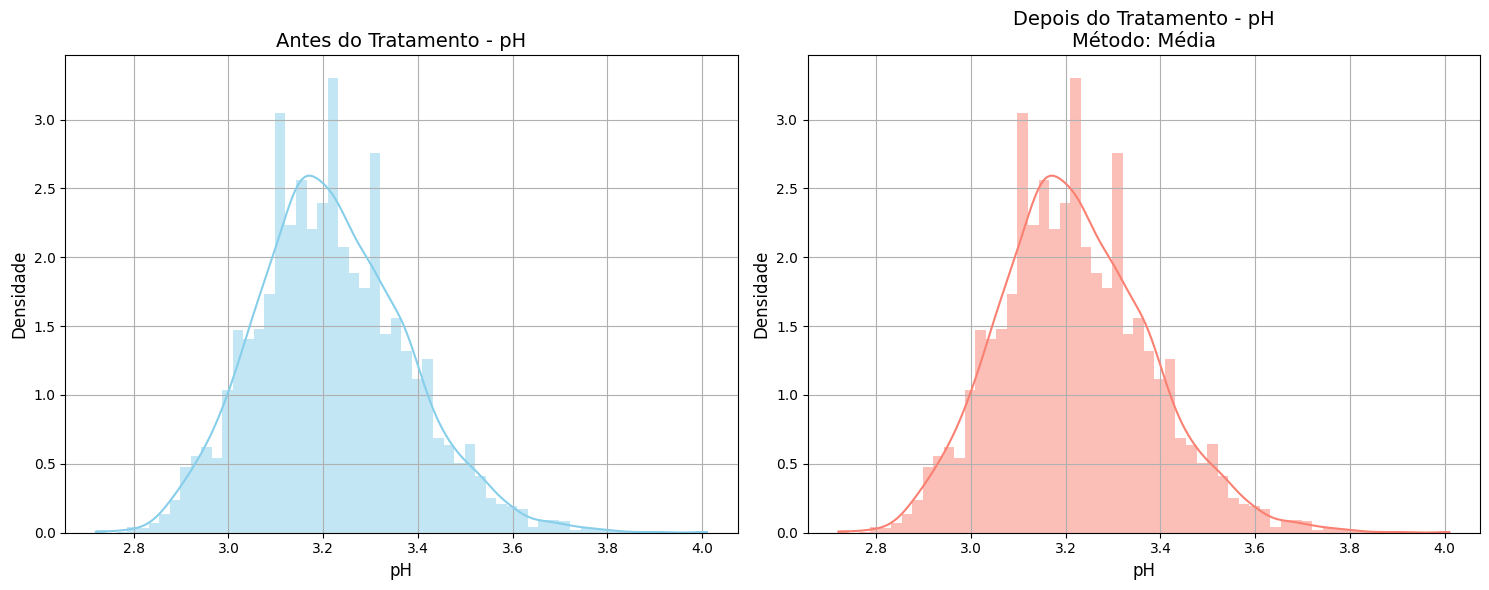

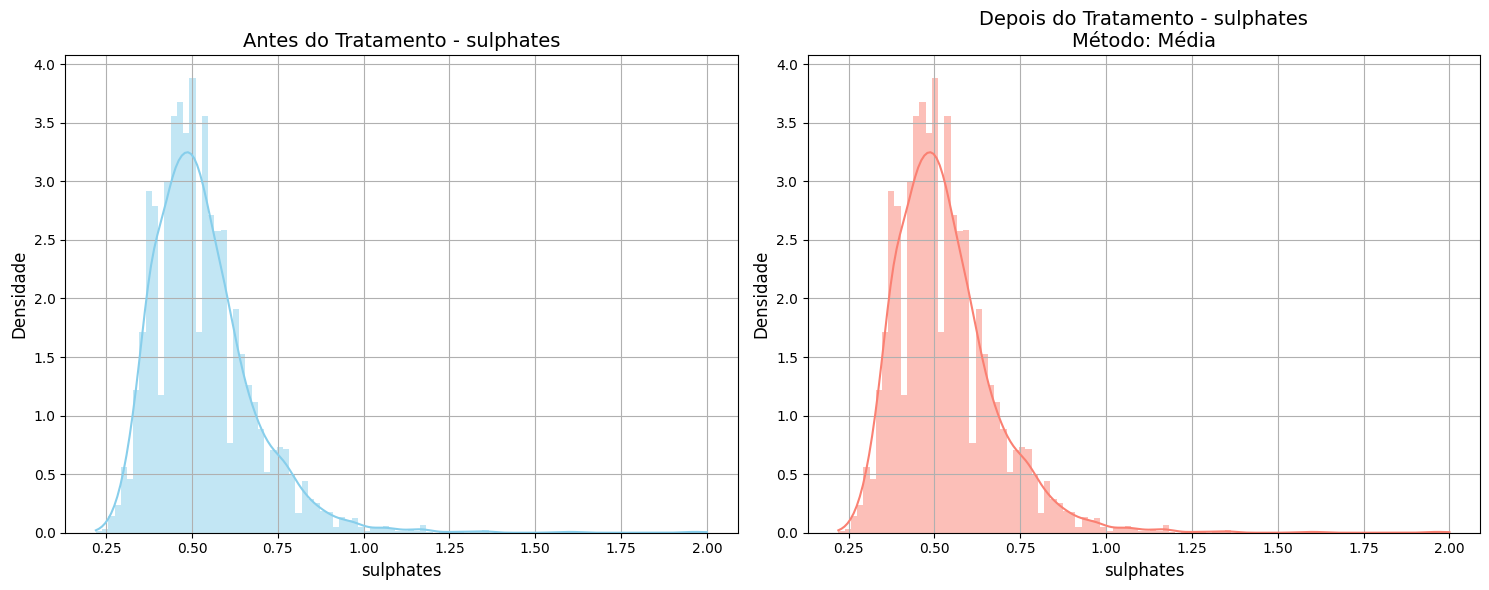

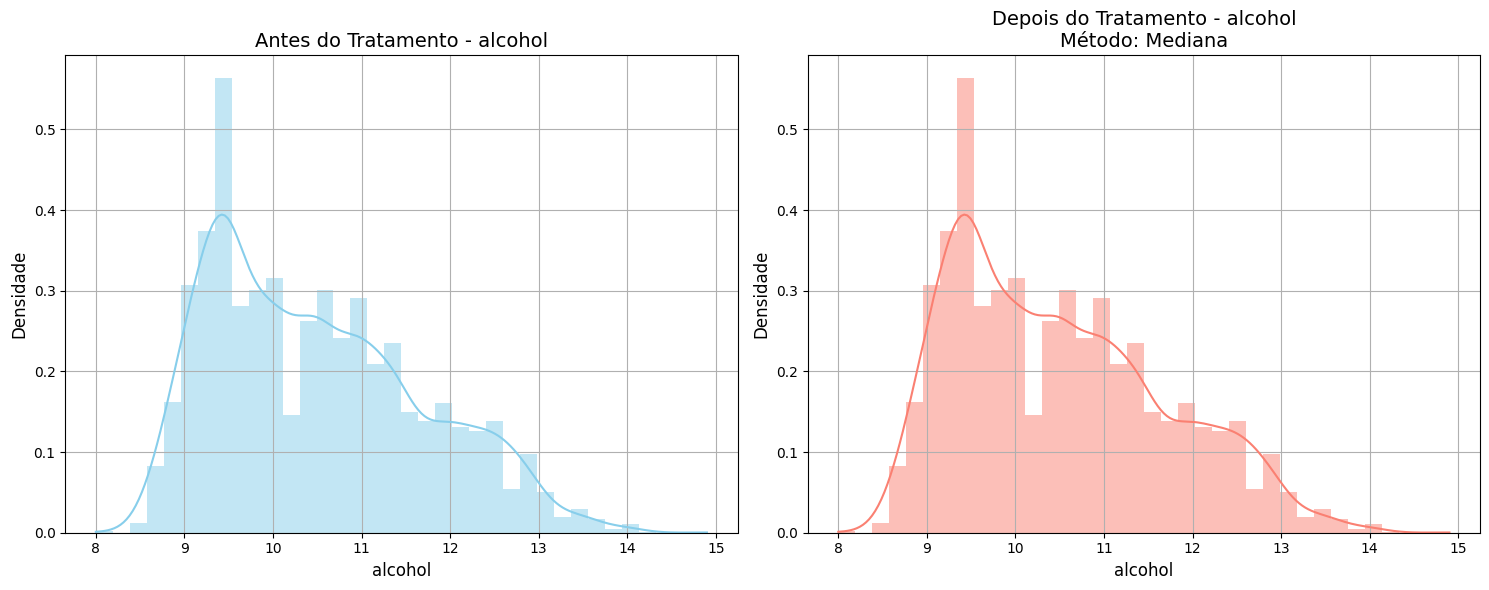

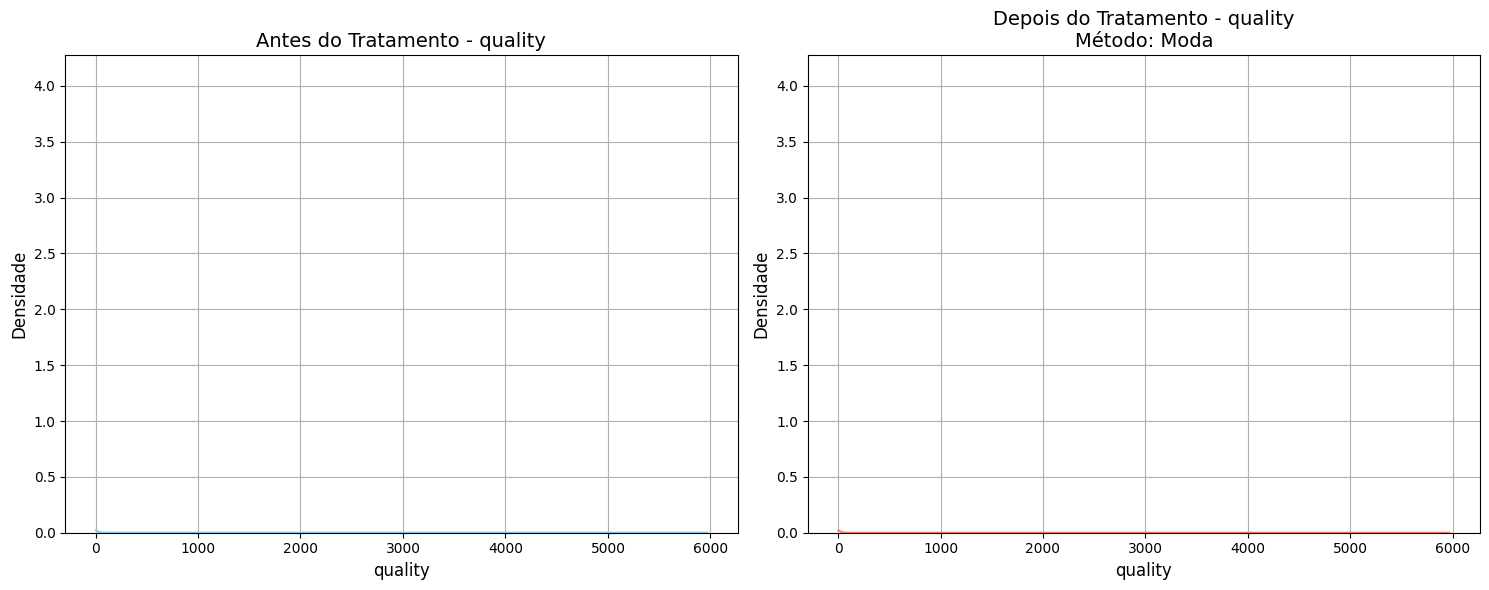

In [3]:
# ================================================
# Função para exibir gráficos de distribuições antes e depois
# ================================================
def plot_distributions_before_after(df, df_treated, column_name, treatment_color):
    # Verifica se a coluna é categórica (ex: 'quality' ou 'color')
    if df[column_name].dtype == 'object' or df[column_name].nunique() < 10:
        # Para variáveis categóricas, fazemos um gráfico de contagem
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Antes do tratamento
        sns.countplot(x=df[column_name], ax=axes[0], color='skyblue')
        axes[0].set_title(f"Antes do Tratamento - {column_name}", fontsize=14)
        axes[0].set_xlabel(column_name, fontsize=12)
        axes[0].set_ylabel('Contagem', fontsize=12)
        axes[0].grid(True)

        # Depois do tratamento
        sns.countplot(x=df_treated[column_name], ax=axes[1], color='salmon')
        axes[1].set_title(f"Depois do Tratamento - {column_name}\nMétodo: {treatment_color}", fontsize=14)
        axes[1].set_xlabel(column_name, fontsize=12)
        axes[1].set_ylabel('Contagem', fontsize=12)
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()
    else:
        # Para variáveis numéricas, mostramos o gráfico de densidade
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Antes do tratamento
        sns.histplot(df[column_name], kde=True, color='skyblue', label='Antes do Tratamento', stat="density", linewidth=0, ax=axes[0])
        axes[0].set_title(f"Antes do Tratamento - {column_name}", fontsize=14)
        axes[0].set_xlabel(column_name, fontsize=12)
        axes[0].set_ylabel('Densidade', fontsize=12)
        axes[0].grid(True)

        # Depois do tratamento
        sns.histplot(df_treated[column_name], kde=True, color='salmon', label=f'Depois do Tratamento - {column_name}', stat="density", linewidth=0, ax=axes[1])
        axes[1].set_title(f"Depois do Tratamento - {column_name}\nMétodo: {treatment_type}", fontsize=14)
        axes[1].set_xlabel(column_name, fontsize=12)
        axes[1].set_ylabel('Densidade', fontsize=12)
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()

# ============================================================
# Comparando as distribuições antes e depois dos tratamentos
# ============================================================

# Tratamento da coluna 'color'
df_treated['color'] = df['color'].fillna(df['color'].mode()[0])  # Preenchendo com a moda (red ou white)
plot_distributions_before_after(df, df_treated, 'color', 'Moda')

# Iterando pelas colunas e aplicando o tratamento conforme o tipo (Moda, Mediana, Média)
for col, decimals in decimal_places.items():
    # Definir o tipo de tratamento baseado na coluna
    if decimals == 0:
        method = df[col].mode()[0]
    elif decimals == 1:
        method = df[col].median()
    else:
        method = df[col].mean()

    # Preencher valores faltantes conforme o método selecionado
    df_treated[f'{col}'] = df[col].fillna(method)
    
    # Plotar as distribuições antes e depois do tratamento
    if decimals == 0:
        treatment_type = 'Moda'
    elif decimals == 1:
        treatment_type = 'Mediana'
    else:
        treatment_type = 'Média'
    
    plot_distributions_before_after(df, df_treated, col, treatment_type)


O dono da vinícola, Sir. Donald Shelby, tem um filho cursando especialização em ciência de dados, que, ao deparar-se com o dataset, pediu a você que, ao invés de ficar tratando dados com 'essas' técnicas triviais, fizesse um algoritmo de regressão logística para encontrar os valores faltantes na coluna 'Alcohol'. O Sr. Shelby é um homem conhecido como mafioso e considera seu filho um gênio, por isso, você, com fortes receios de sofrer consequências inusitadas por ordem do Don Corleone da atualidade, acatou o "pedido".


4- Desenvolver um algoritmo de regressão logística visando preencher os dados faltantes da coluna "Alcohol". Em seguida, valide os resultados com o dataset **"wines.csv"**, apresentando todas as métricas de classificação estudadas. 

5- Você, ao ver os resultados encontrados, se adiantou e fez um modelo de regressão polinomial para dirimir a questão. Em seguida, validou os resultados com o dataset **"wines.csv"**, utilizando todas as métricas de regressão estudadas. Por fim, escreverá um e-mail explicando o motivo <u>técnico</u> que o levou a não utilizar a regressão logística neste problema, bem como qual a melhor técnica que encontrou para tratar os valores faltantes.

### Análise Exploratória
**Utilize o dataset 'wines.csv'**

A enóloga Marilyn Monroe, direta do Sir. Pounce, tomou conhecimento de suas habilidades exploratórias e requereu gráficos "chiques, reuscados, enfeitados e nada triviais" que mostrassem, de forma interativa todos os dados e seus respectivos insights. A principal exigência é de que as paletas de cores sejam harmônicas, de modo que possam ser utilizadas em apresentações. Para isso, sugeriu a documentação a seguir:
[Colors Palettes](https://plotly.com/python/builtin-colorscales/)

1- Utilize um countplot para averiguar a quantidade de vinhos por cada avaliação de qualidade. 
Separare entre vinhos tintos e brancos, fazendo um gráfico para cada tipo.

2- Utilize um jointplot para descrever a relação entre álcool e açucar. Utilizar o tipo 'KDE'.

3- Utilize um boxplot para verificar se existe algum vinho que seja considerado um outlier. Utilize **x = 'quality'** e **y='residual sugar'**. Identificando os outliers, crie um novo dataframe, utilize um barplot para contabilizar a quantidade de vinhos tintos
e brancos por qualidade de modo que as barras estejam sobrepostas em relação ao tipo de vinho.   

4- Faça um gráfico de correlação e encontre quais são as 'features' que contém correlações
positivas e negativas fortes  entre si. Em seguida, utilize o scatterplot, colocando no eixo "x" e "y"
cada variável correlata e descreva por escrito o motivo da distribuição e o sentido vetorial estarem apresentados
das respectivas formas.

**ps**: Para este problema, entenda como correlações fortes valores menores que -0.4 e maiores que 0.4.

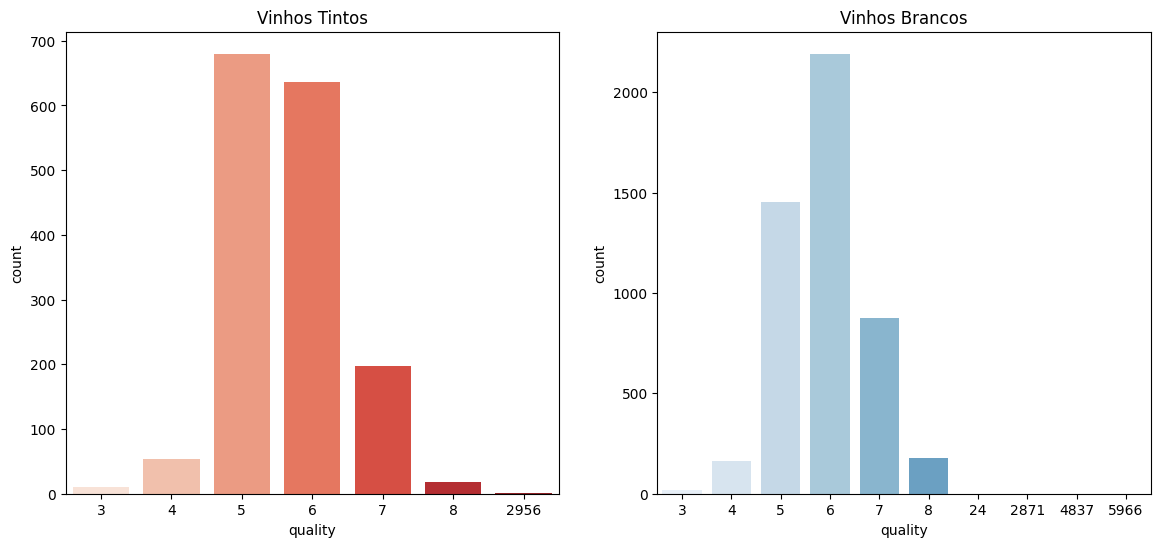

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

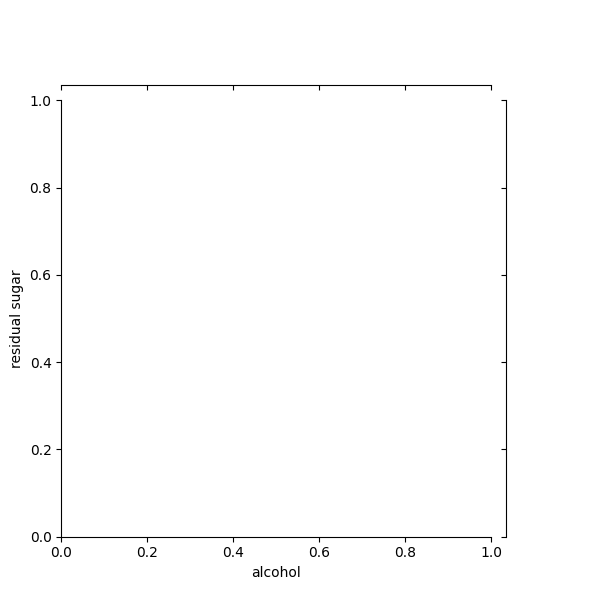

# Modelos Supervisionados 

### Classificação
**Utilize o dataset 'wine_classification.csv'.**

Após alguns meses, o filho do Sir. Donald Shelby, Chuck Norris Shelby, mais conhecido como "El Chavo del Ocho", em decorrência de seu "notório" saber e comportamento extrovertido, ~para ser eufemista~, foi promovido a "*head*" de Machine Learning, vulgo seu chefe. 

Com suas inusitadas e inovadoras ideias, pediu que você criasse três modelos de árvores, um do tipo "random" e dois do tipo "boost", pois havia descoberto que a otimização pelo gradiente descendente era considerada como "*The American Dream*". Não obstante, gostaria de analisar o gráfico de importância das features.

Ademais, requereu que utilizasse o algoritmo SVM, pelo fato do "kernel trick" performar bem em problemas de altas dimensionalidades. Um KNN "cairia bem também, vamos utilizar por mero desencargo de consciência", disse.  

Em seu discurso inflamado, se pronunciava: "Precisamos realizar tais façanhas nunca vistas na história da Inteligência Artificial, desde que as redes neurais foram introduzidas por Walter Pitts e Warren McCulloch em 1943. Vamos predizer tudo que quisermos, independentemente da uva utilizada na produção. Eu transformarei nossa vinícola na melhor do mundo, pois sou detentor do saber". Tudo dito numa reunião contendo 12 pessoas, trabalhadores braçais inclusos. Tal discurso invejou os oráculos delfos e os lembraram de Sócrates em seu julgamento, antes de morrer. 

Após tamanhas proclamações, apontou em sua direção e disse: **"VOCÊ, É..., VOCÊ MESMO**, irás fazer todo o processo por conta própria, e eu direi se o que fazes está correto! Não utilizarás Auto-ML, pois eu, ~professor~, quero ter certeza de que entende seu labor e suas nuâncias". 

Você, cansado e entediado de tantas lorotas, se retirou da reunião com "dores" na região abdominal, porém ainda recebeu um e-mail lhe instruindo a comparar os resultados de todas as implementações, escolher o melhor modelo e utilizar métodos de otimização de hiperparâmetro.  

Em suma?

1- Crie um pipeline que contenha ao menos 05 tipos diferentes de algoritmos de classificação. 

2- Crie um DataFrame que contenha todos os resultados de todos os algoritmos utilizados, inclusive a métrica ROC AUC.

3- Comparar os resultados, escolher o melhor modelo e otimizar os parâmetros. Ao fim, faça um gráfico da ROC AUC.


Após todos seus esforços, o amado chefe lhe pediu para utilizar um algoritmo de classificação que ele ouviu falar, criado pelo matemático inglês Thomas Bayes. Cabe a você, mais uma vez aplicar o algoritmo e apresentar os resultado. Em seguida, faça uma breve explicação do principal problema desse método para solucionar problemas complexos.  

Dr. Anton Ego marcou uma data para comparecer na vinícula e degustar seus melhores rótulos. Nascido na França e o enólogo mais famoso do mundo, Anton era temido pelas suas análises minuciosas e certeiras. As críticas eram tão serveras que tão severas que 80% das vinículas eram fechadas pela falta de aceitação do mercado. Apenas =~ 19.99% sobreviviam sem danos consideráveis e somente $0.1x10^{-15}$% se tornavam uma lenda.

Chuck tomava leite da papoula para suportar tamanha disruptura emocional. Sir.Donald, tomado pela a ansiedade, estava com seus pruridos mentais em Nárnia até que sua esposa, Srta.Audrey Hepburn assumiu a liderança do projeto com a serenidade de um bebê.

Primeiramente ordenou que todos os vinhos que já vinham há algum tempo em processo de envelhecimento em barricas de carvalho fossem engarrafados e que amostras de todos fossem coletadas para análise. 

Sua maior preocupação é que somente sejam servidos os vinhos de nota oito ou nove, pois ambos são de mesmíssima qualidade, ficando a avaliação a critério da subjetividade palatal do degustador. Em **<u>hipótese nenhuma</u>** um vinho que não tenha tais notas pode ser servido.

De todas as novas garrafas, serão servidas somente três que você autorizar. O Dr. Ego só toma vinho tinto!


Sabendo que você já tinha um modelo validado para solucionar este tipo de problema, pediu que o usasse com a base **'desafio.csv''**. Ao fim, crie uma célula e copie os 3 vinhos que escolheu para registrar sua resposta. 


### Modelos não Supervisionados

**Utilize o dataset 'wines.csv' e 'wines_splines.csv'**

Chuck Norris tem um amigo famoso no mundo da ciência de dados, seu nome é Rocky Balboa. Em uma conversa sobre alguns métodos que podem ser utilizados para criar novos vetores (_features engineering_), o Sr.Rocky propôs que fossem utilizados Splines. Completamente emocionado com a ideia, Chuck decidiu aplicar esta técnica utilizando até a oitava potência. 

Ele pediu a você que fizesse um estudo comparativo utilizando o PCA. O intuito é analisar se a redução de dimensionalidade pode ser vantajosa para o dataset original e o dataset com Splines. 

1- Compare a variância explicada de cada um dos datasets

2- Explique porque o PCA seria, ou não uma boa abordagem para o dataset com Splines. Ademais, discorra sobre a influência de ruídos.

3- Utilize um loop "for" e crie uma condição para que, quando a variância for maior do que 0.92, seja retornado o número de features totais, faça para ambos datasets.

**Utilize o dataset 'wines.csv'**

Uma ideia realmente interessante é a clusterização. Por vezes, podemos nos espantar com certos resultados. Aqui, você deve utilizar o dataset original e separar cada nota em um cluster. 

1- Validar os resultados do algoritmo Kmeans com o dataset original

2- Aplicar o método do Cotovelo e averiguar se o número de clusters apontados são iguais ao número de cluster que você tem de usar.

3- Utilizar o método da Silhueta e averiguar se o número de clusters apontados são iguais ao número de cluster que você tem de usar.

4- Explique os principais conceitos dos métodos das questões 2 e 3.

**Utilize o dataset 'logs_firewall.xlsx'**

A Università di Bologna tem cursos de graduação e pós graduação em enologia. Os grandes enólogos do mundo são os únicos que podem fazer o doutorado nesta renomada universidade. Esta instituição tem um contrato milionário com o Sr.Donald, onde todos os alunos poderiam comparecer uma semana a cada três meses para estudar as características, mecânicas de plantações, tecnologias, processos de confecção dos vinhos, entre outras matérias. Todos os professores, escanções extremamente bem conceituados, sempre estão presentes. 

Caso infortúnio, O Sr.Hafþór Júlíus Björnsson, mais conhecido como "o Montanha", chefe de segurança cibernética da empresa apertou o botão DEFCON-1 ao perceber que os servidores tinham sido 'hackeados'. Momento em que notou que os bancos de dados que continham as notas dos vinhos haviam sido alterados/deletados e o backup infectado por um Ransomware chamado "HUE HUE HUE BR". Aparentemente, os black-hats conseguiram alterar de 5% a 25% dos dados referentes aos vinhos tintos, antes que o Montanha conseguisse exterminar as conexões dos servidores. 

O Sr.Donald Shelby aproximou-se para falar com você sobre as políticas da empresa, criadas por sua esposa, que dispunham sobre o bem estar, ambiente não tóxico, agregação dos "colaboradores" ~pseudo escravos~ como familiares, dentre outros ideais da mesma seara. Em seguida incorporou o espírito de Don Corleone e proferiu uma de suas máximas ao falar "Política é saber a hora de puxar o gatilho".   

Uma regra clara da empresa dispõe sobre a impossibilidade de extrair datasets como arquivos e, toda vez que for utilizar os dados no Jupyter Notebook, deve ser realizado uma query no datalake. Ocorre que, 'sem querer querendo', você estava "desatento" e salvou os dados para estudos quando estivesse em casa. Nítido que se disse-se que havia copiado quaisquer dados seria torturado, por isso não poderia simplesmente colocá-los de volta no banco e, como não queria morrer, tinha de encontrar vias oblíquas para dirimir a questão. 

Erick Cartman, analista de infraestrutura, recebeu ordens para recuperar os dados a qualquer custo e, caso falhasse, seria devidamente penalizado ~executado~. Desolado, regado a fanta uva, com palavras arrastadas e chiadas, Erick lhe pediu ajuda. Com muita pena, pegou seu disquete que continha a cópia dos dados e o entregou, pedindo extrema confidencialidade.

Para sua surpresa, após ter a vida salva, receber aumentos salariais e bonificações, Erick te chantageou. "Agora pediram para eu analisar os logs do firewall que contém informações de acesso a servidores e descobrir os possíveis culpados. Eu não sei fazer isso não, 'ocê tá LOUKO'. Dá teus pulos aí se não eu te conto que você copia dados da empresa!!!"

Conhecedor de diversas técnicas para detecção de outliers, se lembrou de uma que já tinha experiência: Isolation Forest. 

1- Descubra o nome do responsável pelo o ataque.

**ps**: Recentemente houve um estudo estatístico que comprovou que existe um fator de risco em relação aos horários de acesso, são eles:  

Entre 09:00 às 12:00 o risco varia entre 0-10%

Entre 12:00 às 14:00 o risco varia entre 5-10%

Entre 14:00 às 19:00 o risco varia entre 0-10%

Entre 19:00 às 21:00 o risco varia entre 20-30%

Entre 21:00 às 23:00 o risco varia entre 40-50%

Entre 00:00 às 02:00 o risco varia entre 60-80%

Entre 02:00 às 06:00 o risco varia entre 80-100%

Entre 06:00 às 09:00 o risco varia entre 30-40%

**<u>Esse fator pode ser recriado usando o método 'random.uniform', com 'seed' = 64.</u>**